In [1]:
from main import ClusterHandler
import pandas as pd
from pyspark.ml.feature import PCA

In [5]:
data = pd.read_csv("data/molec_structure.csv")
data = data.drop(columns=["material"])

In [6]:
handler = ClusterHandler(data, y="critical_temp")
handler.run_session()
handler.generate_dataframe()


Session 'Session' created on masternode local[*]
Spark UI is available at http://SERENITY.mshome.net:4040



In [7]:
handler.assemble_features()  

In [8]:
handler.scale_features()

In [9]:
dimensions = 3
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)
handler.pca_result.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+--------------------+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|            features|      scaledFeatures|         pcaFeatures|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+-

In [10]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'O': -0.4838221805949385, 'Cu': -0.44296753389015814, 'Ba': -0.33785001048763535, 'Sr': -0.24645917835405465, 'Y': -0.22197462127071793, 'Fe': 0.20759685781767961, 'As': 0.18489715432662718, 'Pt': 0.1508292670874977, 'Bi': -0.1490088776049273, 'C': 0.12450193361921215, 'Ca': -0.1181635511635135, 'B': 0.10020672754938563, 'Nb': 0.09788388638252178, 'K': 0.09546510142673624, 'Tl': -0.0925254998701056, 'Ir': 0.09245336938935791, 'Na': 0.09175730598881686, 'Ga': 0.08593335550756946, 'Hg': -0.08336100694039952, 'Mg': 0.08301919700641139, 'Rb': 0.08219335595446411, 'Gd': -0.08028103936045493, 'Se': 0.07971105704152719, 'V': 0.07640161755215595, 'S': 0.06955143478441572, 'Mo': 0.06935922694391784, 'Sb': 0.06846957543333425, 'Zr': 0.06838480495416839, 'N': 0.06663191615144475, 'Ta': 0.06612922247092623, 'Ni': 0.06546635768799176, 'In': 0.06513876146900113, 'H': 0.06510528041305072, 'Pd': 0.06392044375483484, 'Rh': 0.06162053892471371, 'Li': 0.06113562325199706, '

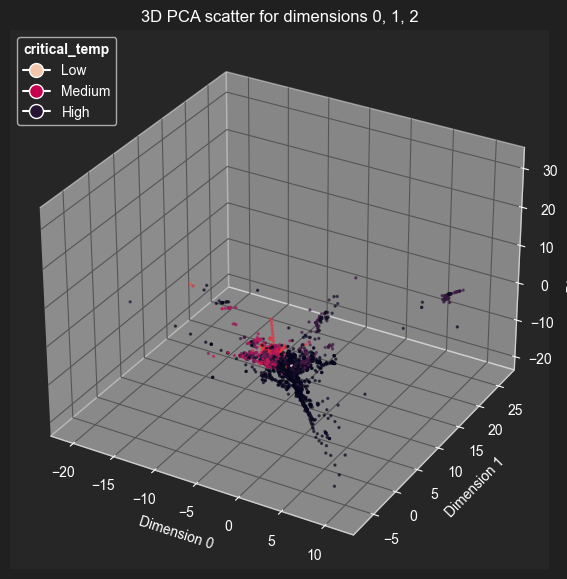

In [11]:
handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")